# Linear regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../zero_to_deep_learning_video/data/weight-height.csv")

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


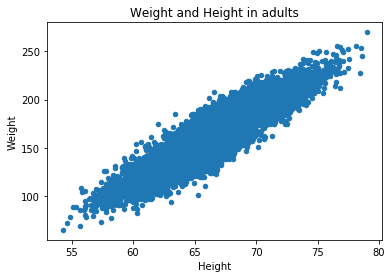

In [6]:
df.plot(kind="scatter",
       x="Height",
       y="Weight",
       title="Weight and Height in adults")

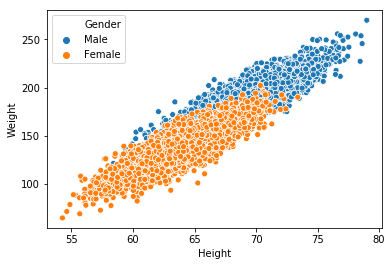

In [7]:
sns.scatterplot(x="Height", y="Weight", data=df, hue="Gender")

In [8]:
def line(x, w=0, b=0):
    return x * w + b

In [9]:
x = np.linspace(55, 80, 100)
yhat = line(x, w=0, b=0)

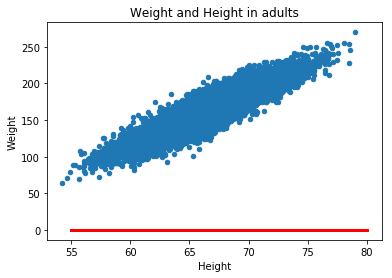

In [10]:
df.plot(kind="scatter",
       x="Height",
       y="Weight",
       title="Weight and Height in adults")
plt.plot(x, yhat, color="red", linewidth=3)

# Cost function

In [11]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [12]:
X = df[["Height"]].values
y_true = df["Weight"].values

In [13]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [14]:
y_pred = line(X)

In [15]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

Text(0.5, 0, 'b')

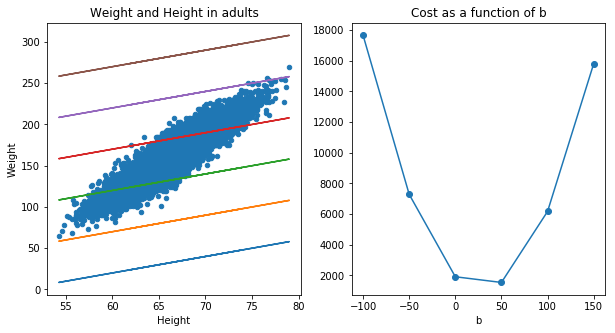

In [16]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

# Linear regression with Keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [19]:
model = Sequential()

In [20]:
model.add(Dense(1, input_shape=(1,)))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(Adam(lr=0.8), "mean_squared_error")

In [25]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 112us/step - loss: 1246.0059
Epoch 2/40
10000/10000 [==============================] - 0s 17us/step - loss: 556.8768
Epoch 3/40
10000/10000 [==============================] - 0s 16us/step - loss: 525.1434
Epoch 4/40
10000/10000 [==============================] - 0s 18us/step - loss: 498.8847
Epoch 5/40
10000/10000 [==============================] - 0s 18us/step - loss: 445.3976
Epoch 6/40
10000/10000 [==============================] - 0s 17us/step - loss: 417.9474
Epoch 7/40
10000/10000 [==============================] - 0s 17us/step - loss: 375.8904
Epoch 8/40
10000/10000 [==============================] - 0s 17us/step - loss: 360.5931
Epoch 9/40
10000/10000 [==============================] - 0s 17us/step - loss: 318.4617
Epoch 10/40
10000/10000 [==============================] - 0s 21us/step - loss: 280.8300
Epoch 11/40
10000/10000 [==============================] - 0s 28us/step - loss: 257.8402
Epoch 12/40
10000/10000 [===

In [26]:
y_pred = model.predict(X)